In [1]:
# Importando módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Lendo dataSets
df = pd.read_csv('weekly-infos-before.csv')

C:\Users\leona\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906649 entries, 0 to 3906648
Data columns (total 45 columns):
user                                object
week                                int64
total_sessions                      int64
total_mediaids                      int64
total_days                          int64
total_played                        float64
max_played_time                     float64
age_without_access                  int64
sexo                                object
idade                               float64
cidade                              object
estado                              object
android_app_time                    float64
ios_app_time                        float64
tv_app_time                         float64
mobile_web_time                     float64
desktop_web_time                    float64
time_spent_on_news                  float64
time_spent_on_humor                 float64
time_spent_on_series                float64
time_spent_on_novelas

In [4]:
len(df)

3906649

#### Colunas vazias em Amarelo

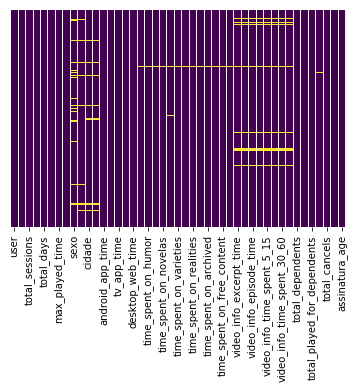

In [5]:

sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [6]:
def completa(data):
    data['sexo'] = data['sexo'].fillna(0)
    data['idade'] = data['idade'].fillna(0)
    data['cidade'] = data['cidade'].fillna('0')
    data['estado'] = data['estado'].fillna('0')
    data['android_app_time'] = data['android_app_time'].fillna(0)
    data['tipo_de_cobranca'] = data['tipo_de_cobranca'].fillna(0)
    

In [7]:
completa(df)

##### Identifica Tipos de Cobrança para trocar por números

In [8]:
tipo_de_cobranca = df['tipo_de_cobranca']

In [9]:
tipo_de_cobranca = tipo_de_cobranca.drop_duplicates()

In [10]:
tipo_de_cobranca

0             CARTAO DE CREDITO
1             DEBITO AUTOMATICO
2                             0
69              BOLETO BANCARIO
78              IN APP PURCHASE
742                  BOLETO WEB
5686                  GIFT CARD
58686        DEBITO INSTANTANEO
100225    DEPOSITO IDENTIFICADO
Name: tipo_de_cobranca, dtype: object

In [11]:
# Troca valores String por Numeros
def troca(data7):
   data7['sexo'].replace(['M','F'],[1,2],inplace=True) 
   data7['tipo_de_cobranca'].replace(['CARTAO DE CREDITO','DEBITO AUTOMATICO','BOLETO BANCARIO','IN APP PURCHASE','BOLETO WEB','GIFT CARD','DEBITO INSTANTANEO','DEPOSITO IDENTIFICADO']
                               ,[1,2,3,4,5,6,7,8],inplace=True)

In [12]:
troca(df)

In [13]:
str_cols = df.columns[df.dtypes== float]
df[str_cols] = df[str_cols].fillna(0)

In [14]:
# Conta o número de Colunas com Null
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [15]:
df.head()

,user,week,total_sessions,total_mediaids,total_days,total_played,max_played_time,age_without_access,sexo,idade,...,video_info_time_spent_15_30,video_info_time_spent_30_60,video_info_time_spent_60mais,total_dependents,total_active_dependents,total_played_for_dependents,tipo_de_cobranca,total_cancels,month_subs,assinatura_age
0,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,1,1,3,1,48.14,48.14,-292,1,53.0,...,0.0,45.963833,0.0,0,0,0.0,1,2,10,2337.0
1,P1Q529iTlIQRDHgKKRyKoGLEX2jE3kZe9ziVCyShEFw=,1,1,1,1,0.90,0.90,0,1,29.0,...,0.0,0.000000,0.0,0,0,0.0,2,1,3,1.0
2,WPGY8FeCyrvDTMRbURnLGCJ1QWFKTP8kgAAW92FSKTk=,1,1,1,1,12.68,12.68,-279,1,25.0,...,0.0,0.000000,0.0,0,0,0.0,0,1,8,194.0
3,0Tw9SBl0wiXW0Fhb-s8IRf8nbnhs2iKBH6ONxBne5ho=,1,1,1,1,27.01,27.01,0,0,0.0,...,0.0,0.000000,0.0,0,0,0.0,2,1,2,36.0
4,X4f_bBYnBTL8_wN_CRB4yH9_G9B3JnUC9m45GwJ6_Ew=,1,1,12,1,1.16,1.16,0,1,54.0,...,0.0,0.000000,0.0,0,0,0.0,1,1,7,239.0


In [16]:
#Lendo dataSets
df1 = pd.read_csv('user-status-after.csv')

In [17]:
df1.head()

,user,status
0,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,cancelou
1,P1Q529iTlIQRDHgKKRyKoGLEX2jE3kZe9ziVCyShEFw=,cancelou
2,WPGY8FeCyrvDTMRbURnLGCJ1QWFKTP8kgAAW92FSKTk=,cancelou
3,0Tw9SBl0wiXW0Fhb-s8IRf8nbnhs2iKBH6ONxBne5ho=,cancelou
4,X4f_bBYnBTL8_wN_CRB4yH9_G9B3JnUC9m45GwJ6_Ew=,cancelou


#### Colocando o status/Churn na tabela weekly-infos (Merge das Tabelas)

In [18]:
df_Status = pd.merge(df, df1, left_on = 'user', right_on = 'user')

In [19]:
len(df_Status)

3906649

In [20]:
df_Status.head()

,user,week,total_sessions,total_mediaids,total_days,total_played,max_played_time,age_without_access,sexo,idade,...,video_info_time_spent_30_60,video_info_time_spent_60mais,total_dependents,total_active_dependents,total_played_for_dependents,tipo_de_cobranca,total_cancels,month_subs,assinatura_age,status
0,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,1,1,3,1,48.14,48.14,-292,1,53.0,...,45.963833,0.0,0,0,0.0,1,2,10,2337.0,cancelou
1,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,6,4,34,3,113.93,60.98,-292,1,53.0,...,47.086083,0.0,0,0,0.0,1,2,10,2337.0,cancelou
2,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,7,1,3,1,23.98,23.98,-292,1,53.0,...,0.000000,0.0,0,0,0.0,1,2,10,2337.0,cancelou
3,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,8,1,1,1,7.62,7.62,-292,1,53.0,...,7.617617,0.0,0,0,0.0,1,2,10,2337.0,cancelou
4,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,5,1,1,1,46.98,46.98,-292,1,53.0,...,46.981733,0.0,0,0,0.0,1,2,10,2337.0,cancelou


#### Converte status para Int

In [21]:
df_Status['status'].replace(['assinante','cancelou'],[0,1],inplace=True) 

#### Análise dos Clientes

In [22]:
df_User =  df_Status[['user','sexo','idade','cidade','estado','total_dependents','tipo_de_cobranca','assinatura_age','status']]

In [23]:
df_User = df_User.drop_duplicates(['user'],keep= 'last').reset_index(drop=True)

##### Calculando qtas semanas cada cliente utilizou a Assinatura

In [25]:
df_Num_Weeks = df.groupby(['user'])['week'].count()
df_Num_Weeks = df_Num_Weeks.to_frame().reset_index()

In [26]:
df_Num_Weeks.tail()

,user,week
561153,zzxfo5nkMy6E9Pv72UvTtcZfp9fWAlqlprYrzVd0jT0=,16
561154,zzy7CDXqvykp-g7-IlF1U_ajfBaUvdcT9uH-MsKsQak=,14
561155,zzyPBy5CY7VDU-HbHF1c184kkHCpP3DMxsrfj1zQ0m8=,10
561156,zzzk3q8rBw-2DfoS6lAjEaqdBkUlU__gDvi1q2igI3U=,9
561157,zzzwaYosOe-v4qYPcZ2ZyG8o_twrw-YwMs4GAFooL9c=,1


#### Colocando o status na tabela weekly-infos

In [27]:
df_User_Weeks = pd.merge(df_User, df_Num_Weeks, left_on = 'user', right_on = 'user')

In [28]:
df_User_Weeks = df_User_Weeks.rename(columns={'week': 'NumWeeks'})

#### Num de Clientes

In [29]:
len(df_User_Weeks)

561158

In [30]:
df_User_Weeks.head()

,user,sexo,idade,cidade,estado,total_dependents,tipo_de_cobranca,assinatura_age,status,NumWeeks
0,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,1,53.0,São Vicente,Sao Paulo,0,1,2337.0,1,6
1,P1Q529iTlIQRDHgKKRyKoGLEX2jE3kZe9ziVCyShEFw=,1,29.0,Guarulhos,Sao Paulo,0,2,1.0,1,1
2,WPGY8FeCyrvDTMRbURnLGCJ1QWFKTP8kgAAW92FSKTk=,1,25.0,Taguatinga,Distrito Federal,0,0,194.0,1,5
3,0Tw9SBl0wiXW0Fhb-s8IRf8nbnhs2iKBH6ONxBne5ho=,0,0.0,0,0,0,2,36.0,1,5
4,X4f_bBYnBTL8_wN_CRB4yH9_G9B3JnUC9m45GwJ6_Ew=,1,54.0,Triunfo,Pernambuco,0,1,239.0,1,2


#### Criando features numéricas

In [31]:
df_Estado = df_User_Weeks['estado'].reset_index(drop=True)

In [32]:
df_Estado = df_Estado.drop_duplicates()

In [33]:
df_Estado = df_Estado.to_frame()

In [34]:
df_Estado = df_Estado.sort_values(by=['estado'],ascending=True, na_position='first').reset_index(drop=True)


In [35]:
df_Estado.tail()

,estado
25,Roraima
26,Santa Catarina
27,Sao Paulo
28,Sergipe
29,Tocantins


In [36]:
df_Cidade = df_User_Weeks['cidade'].reset_index(drop=True)

In [37]:
df_Cidade = df_Cidade.drop_duplicates()

In [38]:
df_Cidade = df_Cidade.to_frame()

In [39]:
df_Cidade = df_Cidade.sort_values(by=['cidade'],ascending=True, na_position='first').reset_index(drop=True)

In [40]:
df_Cidade.loc[3989]

cidade    Rio Branco
Name: 3989, dtype: object

In [41]:
df_Cidade.head()

,cidade
0,*** NAO INFORMADA ***
1,0
2,4º Centenário
3,Abacate da Pedreira (Macapá)
4,Abadia (Jandaíra)


In [42]:
def numCidade(x):
    num = df_Cidade[df_Cidade['cidade']==x].index.values.astype(int)[0]
    return num

In [43]:
def numEstado(x):
    num = df_Estado[df_Estado['estado']==x].index.values.astype(int)[0]
    return num

In [44]:
df_User_Weeks['xEstado'] = df_User_Weeks['estado'].apply(numEstado)

In [45]:
df_User_Weeks['xCidade'] = df_User_Weeks['cidade'].apply(numCidade)

In [46]:
df_User_Weeks.drop(['cidade', 'estado'], axis=1, inplace=True)


In [47]:
df_User_Weeks = df_User_Weeks.rename(columns={'status': 'churn'})

In [48]:
# Trocando ordem das colunas
df_User_Weeks = df_User_Weeks[['user', 'sexo', 'idade', 'total_dependents','tipo_de_cobranca','assinatura_age','xEstado','xCidade','NumWeeks','churn']]


In [49]:
df_User_Weeks.head()

,user,sexo,idade,total_dependents,tipo_de_cobranca,assinatura_age,xEstado,xCidade,NumWeeks,churn
0,so7GZdbcbHAJvHLMz8hqrb4215jh-zJIWXRmTFUNCtQ=,1,53.0,0,1,2337.0,27,4772,6,1
1,P1Q529iTlIQRDHgKKRyKoGLEX2jE3kZe9ziVCyShEFw=,1,29.0,0,2,1.0,27,1987,1,1
2,WPGY8FeCyrvDTMRbURnLGCJ1QWFKTP8kgAAW92FSKTk=,1,25.0,0,0,194.0,7,4795,5,1
3,0Tw9SBl0wiXW0Fhb-s8IRf8nbnhs2iKBH6ONxBne5ho=,0,0.0,0,2,36.0,0,1,5,1
4,X4f_bBYnBTL8_wN_CRB4yH9_G9B3JnUC9m45GwJ6_Ew=,1,54.0,0,1,239.0,19,4941,2,1


#### Gravando a Tabela User com Novas Features

In [50]:
df_User_Weeks.to_csv('User.csv',decimal='.',float_format='%.2f',encoding='utf-8', index=False)

In [51]:
df_User_Weeks.describe()

,idade,total_dependents,tipo_de_cobranca,assinatura_age,xEstado,xCidade,NumWeeks,churn
count,561158.000000,561158.000000,561158.000000,561158.00000,561158.000000,561158.000000,561158.000000,561158.000000
mean,44.652333,0.245300,1.772080,1120.70686,17.501609,2995.163587,6.961763,0.034776
std,26.826041,0.828879,1.007686,1542.64333,9.794661,1642.232574,5.198027,0.183213
min,0.000000,0.000000,0.000000,-1.00000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,91.00000,8.000000,1535.000000,2.000000,0.000000
50%,41.000000,0.000000,2.000000,328.00000,23.000000,3838.000000,6.000000,0.000000
75%,55.000000,0.000000,2.000000,1622.00000,27.000000,4290.000000,11.000000,0.000000
max,119.000000,13.000000,8.000000,6579.00000,29.000000,5245.000000,30.000000,1.000000


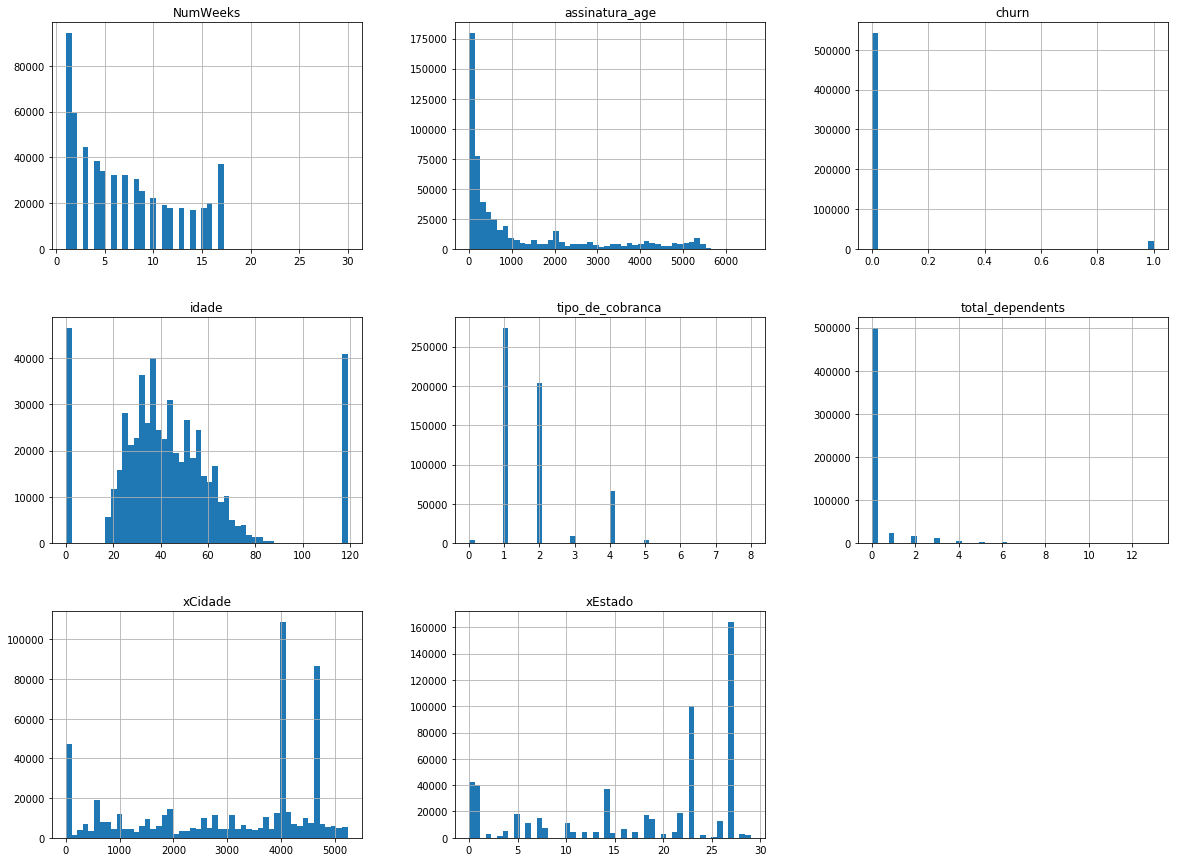

In [52]:
df_User_Weeks.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df_Zero_User = df_User_Weeks[(df_User_Weeks['idade'] ==0) | (df_User_Weeks['idade'] > 100)]

In [61]:
Idade_Maior_100 =df_User_Weeks[df_User_Weeks['idade'] > 100] 

In [62]:
len(Idade_Maior_100)

40837

In [63]:
df_User_Weeks.ix[df_User_Weeks.idade > 100, ['idade']] = 45

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [64]:
Idade_Menor_Dez = df_User_Weeks[df_User_Weeks['idade'] < 10] 

In [65]:
len(Idade_Menor_Dez)

46541

In [66]:
df_User_Weeks.ix[df_User_Weeks.idade < 10, ['idade']] = 25

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [67]:
Idade_Menor_Dez = df_User_Weeks[df_User_Weeks['idade'] < 10] 

In [68]:
len(Idade_Menor_Dez)

0

In [71]:
def cidade(x):
    return df_Cidade.loc[x]

In [72]:
city= cidade(3989)
city

cidade    Rio Branco
Name: 3989, dtype: object

##### Gravando tabela

In [73]:
df_User_Weeks.to_csv('User.csv',decimal='.',float_format='%.2f',encoding='utf-8', index=False)

#### Consumo de Produtos

In [78]:
df_Produtos = df_Status.groupby(['status', 'user'])["total_sessions", "total_mediaids","total_days","total_played","android_app_time",
                        'ios_app_time','tv_app_time','mobile_web_time','desktop_web_time','time_spent_on_news',
                        'time_spent_on_humor','time_spent_on_series','time_spent_on_novelas','time_spent_on_special',
                        'time_spent_on_sports','time_spent_on_realities','time_spent_on_disclosure','time_spent_on_archived',
                        'time_spent_on_grade','time_spent_on_subscribed_content','time_spent_on_free_content' ,
                        'video_info_excerpt_time','video_info_extra_time','video_info_episode_time',
                        'video_info_time_spent_0_5','video_info_time_spent_5_15','video_info_time_spent_15_30',
                        'video_info_time_spent_30_60','video_info_time_spent_60mais','total_active_dependents'].sum().reset_index()

In [79]:
len(df_Produtos)

561158

In [80]:
df_Produtos.head(15)

,status,user,total_sessions,total_mediaids,total_days,total_played,android_app_time,ios_app_time,tv_app_time,mobile_web_time,...,time_spent_on_free_content,video_info_excerpt_time,video_info_extra_time,video_info_episode_time,video_info_time_spent_0_5,video_info_time_spent_5_15,video_info_time_spent_15_30,video_info_time_spent_30_60,video_info_time_spent_60mais,total_active_dependents
0,0,---3O9IoMUoaGDZG87g6OEDuuo-WYXaxN1pMOCyeqy4=,3,5,3,63.74,0.0,0.00,0.00,0.00,...,10.151633,0.000000,0.000000,48.432983,0.000000,0.000000,0.00000,6.821200,41.611783,0
1,0,--0JRL6tA0PVx-sTQf35MjH5vZfK1fSi640oHXviUfU=,7,23,6,164.51,0.0,0.00,0.00,0.00,...,31.197317,25.728583,5.468733,63.246000,23.273650,7.923667,0.00000,63.246000,0.000000,0
2,0,--0YC2EzVcnW7kkoTEwCvRips-nLwRzaL2OpOHAR1K8=,3,3,3,6.10,0.0,6.10,0.00,0.00,...,0.002300,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
3,0,--137VN7H4wWewQngTMnsQ==,6,12,6,167.76,0.0,167.52,0.00,0.24,...,0.000000,0.000000,0.000000,0.242983,0.000000,0.000000,0.00000,0.242983,0.000000,0
4,0,--2wHGzXjzcr3fgcH4hIrwsI-ireVTjV3YA01_Qqf1E=,2,4,2,9.95,0.0,0.00,0.00,9.95,...,4.340117,4.340117,0.000000,5.609350,4.340117,0.000000,0.00000,5.609350,0.000000,0
5,0,--3SuBT4apjzAVU2DFAEgxuMq28U_yiMRIqdINlnQAk=,58,86,47,2270.97,0.0,0.00,0.00,2255.92,...,28.802567,28.802567,0.000000,2210.781300,9.544583,19.257983,22.50110,1998.442700,189.837500,0
6,0,--3YA_XfzP7dztFXmyHUWfM1Wf-YKwKH5DdoKHRNsXY=,18,22,18,302.41,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
7,0,--3n4dc-ayiO6tXl1dA7aqBgo5DUKzdP33FQ6SyHzks=,1,1,1,41.66,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,41.664217,0.000000,0.000000,0.00000,41.664217,0.000000,0
8,0,--4UUgmj60T94uUv_d-eRJ7Fhf3Y-NPfUVIP9CS5VQA=,50,70,24,1778.14,0.0,1.97,1769.96,6.21,...,12.982050,12.982050,0.000000,1396.702433,12.982050,0.000000,42.98555,1166.712950,187.003933,0
9,0,--50-OQvIRVfNQjVMi0qaDVPeaJ8ri0D7OPCapQGrtI=,6,23,4,208.38,0.0,0.00,0.00,60.27,...,112.742450,59.491150,0.000000,0.354583,6.474717,53.016433,0.00000,0.000000,0.354583,0


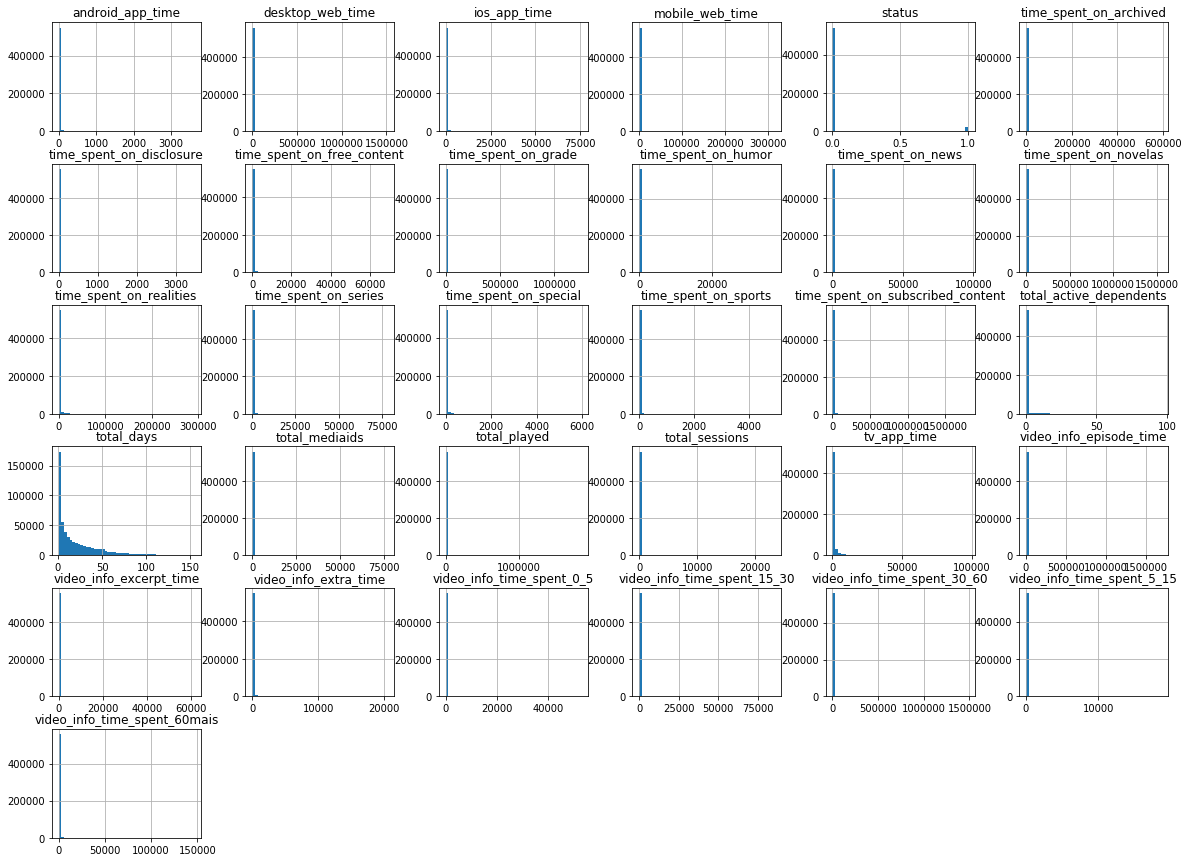

In [81]:
df_Produtos.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# max_played_time** : tempo máximo que passou em uma mídia
# age_without_access** : dias que não vem ao produto (anterior ao consumo atual)

In [82]:
df_Produtos = df_Produtos.drop(columns='status')

In [83]:
df_Churn = pd.merge(df_Produtos, df_User_Weeks, left_on = 'user', right_on = 'user')

In [84]:
len(df_Churn)

561158

In [85]:
df_Churn.head()

,user,total_sessions,total_mediaids,total_days,total_played,android_app_time,ios_app_time,tv_app_time,mobile_web_time,desktop_web_time,...,total_active_dependents,sexo,idade,total_dependents,tipo_de_cobranca,assinatura_age,xEstado,xCidade,NumWeeks,churn
0,---3O9IoMUoaGDZG87g6OEDuuo-WYXaxN1pMOCyeqy4=,3,5,3,63.74,0.0,0.00,0.0,0.00,63.74,...,0,0,25.0,0,1,130.0,0,1,3,0
1,--0JRL6tA0PVx-sTQf35MjH5vZfK1fSi640oHXviUfU=,7,23,6,164.51,0.0,0.00,0.0,0.00,164.51,...,0,1,34.0,0,2,4176.0,4,2795,5,0
2,--0YC2EzVcnW7kkoTEwCvRips-nLwRzaL2OpOHAR1K8=,3,3,3,6.10,0.0,6.10,0.0,0.00,0.00,...,0,0,45.0,0,4,61.0,1,3989,3,0
3,--137VN7H4wWewQngTMnsQ==,6,12,6,167.76,0.0,167.52,0.0,0.24,0.00,...,0,1,64.0,5,2,5198.0,19,3915,5,0
4,--2wHGzXjzcr3fgcH4hIrwsI-ireVTjV3YA01_Qqf1E=,2,4,2,9.95,0.0,0.00,0.0,9.95,0.00,...,0,2,59.0,0,4,211.0,23,1002,2,0


In [86]:
#Lendo dataSets
df_Churn.to_csv('Churn.csv',decimal='.',float_format='%.2f',encoding='utf-8', index=False)